𝑞 차 MA(Moving Average) 모형 MA(q)는 확률과정의 현재 값 𝑌𝑡가 백색 잡음의 현재 값 𝜖𝑡부터 𝑞-시간 지연된 𝜖𝑡−𝑞까지 𝑞+1개 항의 선형 가중합인 확률과정 모형이다. MA(q)라고 쓴다.

$$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots  + \theta_q \epsilon_{t-q}$$

## 1차 MA모형

1차 MA모형 MA(1)의 현재 값  𝑌𝑡 은 백색 잡음의 현재 값과 1-스텝 지연된 과거 값의 합이다.

$$Y_t = \epsilon_t + \theta \epsilon_{t-1}$$

MA(1) 모형의 기댓값  𝜇 와 분산  𝛾0 , 그리고 자기공분산  𝛾𝑙 는 각각 다음과 같다.

$$\mu = \text{E}[Y_t] = 0$$

$$\gamma_0 = \text{Var}[Y_t] = \sigma_{\epsilon}^2 (1 + \theta^2)$$

$$\gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = \theta \sigma_\epsilon^2$$

$$\gamma_l = 0 \; \text{ for } l > 1$$

이 식에서  𝜎2𝜖 는 백색 잡음의 분산이다.

증명은 기댓값의 성질과 MA(1) 모형식을 이용한다.

\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ \epsilon_t + \theta \epsilon_{t-1} \right] \\
&=& \text{E} [ \epsilon_t ] + \theta \text{E} [ \epsilon_{t-1} ] \\
&=& 0 + \theta \cdot 0 \\
&=& 0\\
\end{eqnarray}

\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ (\epsilon_t + \theta \epsilon_{t-1})^2 \right] \\
&=& \text{E} [ \epsilon_t^2 ] + 2 \theta \text{E} [ \epsilon_t \epsilon_{t-1} ] + \theta^2 \text{E} [ \epsilon_{t-1}^2 ] \\
&=& \sigma_\epsilon^2 + 2 \theta \cdot 0 + \theta^2 \sigma_\epsilon^2 \\
&=& \sigma_\epsilon^2 (1 + \theta^2)  \\
\end{eqnarray}

시차가 1, 2인 MA(1) 모형의 자기공분산을 계산해보자.

\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-1}]
&=& \text{E} \left[ (\epsilon_t + \theta \epsilon_{t-1})(\epsilon_{t-1} + \theta \epsilon_{t-2}) \right] \\
&=& \text{E} [ \epsilon_t \epsilon_{t-1} ] + \theta \text{E} [ \epsilon_t \epsilon_{t-2} ] + \theta \text{E} [ \epsilon_{t-1}^2 ] + \theta^2 \text{E} [ \epsilon_{t-1} \epsilon_{t-2} ] \\
&=& 0 + \theta \cdot 0 + \theta \sigma_\epsilon^2 + \theta^2 \cdot 0 \\
&=& \theta \sigma_\epsilon^2   \\
\end{eqnarray}

\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-2}]
&=& \text{E} \left[ (\epsilon_t + \theta \epsilon_{t-1})(\epsilon_{t-2} + \theta \epsilon_{t-3}) \right] \\
&=& \text{E} [ \epsilon_t \epsilon_{t-2} ] + \theta \text{E} [ \epsilon_t \epsilon_{t-3} ] + \theta \text{E} [ \epsilon_{t-1} \epsilon_{t-2} ] + \theta^2 \text{E} [ \epsilon_{t-1} \epsilon_{t-3} ] \\
&=& 0 + \theta \cdot 0 + \theta \cdot 0 + \theta^2 \cdot 0 \\
&=& 0  \\
\end{eqnarray}

공분산을 분산으로 나눈 결과인 자기상관계수가 다음 성질을 만족한다는 것도 증명할 수 있다.

$$\rho_1 = \dfrac{\theta}{1+\theta^2}$$

$$\rho_l = 0 \; \text{ for } l > 1$$

### 1차 MA모형의 시뮬레이션

statsmodels의 tsa 서브패키지는 ARMA 확률과정 모형을 위한 ArmaProcess 클래스를 지원한다. 클래스 생성자는 다음과 같다.

#### ArmaProcess(ar_coeff, ma_coeff)

생성자의 인수로 사용되는 ar_coeff와 ma_coeff는 각각 모형 수식에 나오는 방정식  𝜙(𝐿) ,  𝜃(𝐿) 의 계수로 이루어진 리스트들이다. 가장 앞의 1이라는 숫자는 항상 있어야 한다.

$$Y_t + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} \cdots + \phi_p Y_{t-p} 
= \mu + 
\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots \theta_q \epsilon_{t-q}$$

$$\phi(L) Y_t = \mu + \theta(L) \epsilon_t$$

\begin{eqnarray}
  \phi(L) &= 1 + \phi_1 L + \phi_2 L^2 + \cdots \phi_p L^p \\
  \theta(L) &= 1 + \theta_1 L + \theta_2 L^2 + \cdots \theta_q L^q
\end{eqnarray}

따라서 MA(1) 모형

$$Y_t = \epsilon_t + \theta \epsilon_{t-1}$$

은 다음과 같이 만들 수 있다. 예제 코드에서는  𝜃=0.9 를 사용하였다.

In [2]:
import statsmodels.api as sm

In [3]:
theta = 0.9
ar = [1]
ma = [1, theta]
p1 = sm.tsa.ArmaProcess(ar, ma)  # 확률과정모형 생성자

ArmaProcess 클래스의 generate_sample 메서드를 이용하여 시계열 표본을 만들 수 있다. generate_sample 메서드는 표본 시계열의 길이와 burnin 인수를 받는다. MA(q) 모형에서는 burnin 인수가 q보다 같거나 커야 한다.

In [4]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [5]:
np.random.seed(0)
y1 = p1.generate_sample(100, burnin=10)  
y1.shape

(100,)

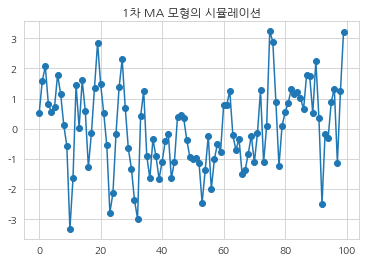

In [7]:
plt.plot(y1, 'o-')
plt.title("1차 MA 모형의 시뮬레이션")
plt.show()

이 시계열 데이터의  𝑙 -시차 상관계수, 즉  𝑌𝑡 와  𝑌𝑡−𝑙 의 상관계수를 조사하기 위해 스캐터플롯을 그려보았다.  𝑙=1 일 때만 상관관계가 있고  𝑙>1 이면 상관관계가 없다는 것을 확인할 수 있다.

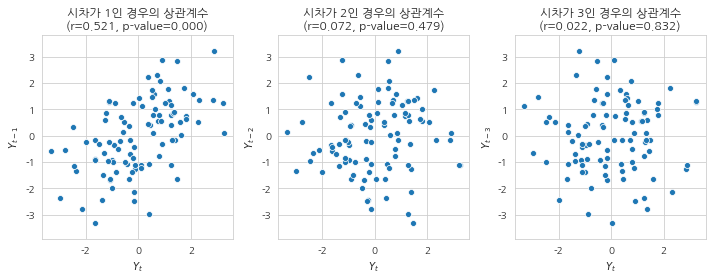

In [21]:
import scipy as sp

plt.figure(figsize=(10, 4))

plt.subplot(131)
r, p = sp.stats.pearsonr(y1[1:], y1[:-1])  # 첫 시점을 제외한 것과 마지막 시점을 제외한 시뮬레이션값을 집어 넣음. 상관계수와 유의확률 도출
sns.scatterplot(y1[1:], y1[:-1])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-1}$")
plt.title("시차가 1인 경우의 상관계수\n(r={0:.3f}, p-value={1:.3f})".format(r, p))  # 유의확률이 48%이므로 상관계수를 귀무가설 채택, 0이라고 할 수 있음

plt.subplot(132)
r, p = sp.stats.pearsonr(y1[2:], y1[:-2])
sns.scatterplot(y1[2:], y1[:-2])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-2}$")
plt.title("시차가 2인 경우의 상관계수\n(r={0:.3f}, p-value={1:.3f})".format(r, p))

plt.subplot(133)
r, p = sp.stats.pearsonr(y1[3:], y1[:-3]) # 시차 2인 경우와 마찬가지로 유의확률이 커서 귀무가설 채택. 즉 상관계수는 0
sns.scatterplot(y1[3:], y1[:-3])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-3}$")
plt.title("시차가 3인 경우의 상관계수\n(r={0:.3f}, p-value={1:.3f})".format(r, p)) 

plt.tight_layout()
plt.show()

이론적 자기상관계수 함수와 표본 자기상관계수 함수를 그리면 다음과 같다.

ArmaProcess 클래스의 acf 메서드는 이론적 자기상관계수 함수의 값을 출력한다. statsmodels.graphics.tsa.plot_acf 명령은 표본 시계열 데이터로부터 표본 자기상관계수 함수의 값을 계산한다.

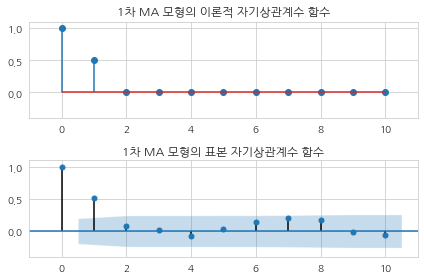

In [27]:
plt.subplot(211)
plt.stem(p1.acf(11), use_line_collection=True) # 11개
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.title("1차 MA 모형의 이론적 자기상관계수 함수")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, lags=10, ax=ax)
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.title("1차 MA 모형의 표본 자기상관계수 함수")

plt.tight_layout()
plt.show()

이론적 자기상관계수는 시차가 0일때 1, 1일때 0.5, 나머지는 0임을 알 수 있고, 실제 표본에서도 나머지 시차에서 거의 0에 가까운 값을 갖고 있음을 알 수 있다.

## 2차 MA모형

#### 2차 MA모형은 다음과 같이 백색 잡음의 현재 값과 1-시간 지연된 과거 값, 그리고 2-시간 지연된 과거 값의 선형 가중합으로 나타난다.

$$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}$$

MA(2) 모형의 기댓값과 분산은 다음 성질을 만족한다.

$$\mu = \text{E}[Y_t] = 0$$

$$\gamma_0 = \text{Var}[Y_t] = \sigma_{\epsilon}^2 (1 + \theta_1^2 + \theta_2^2)$$

이 식에서  𝜎2𝜖 는 백색 잡음의 분산이다.

이는 다음과 같이 증명할 수 있다.

\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} \right] \\
&=& \text{E} [ \epsilon_t ] + \theta_1 \text{E} [ \epsilon_{t-1} + \theta_2 \text{E} [ \epsilon_{t-2} ] \\
&=& 0 + \theta_1 \cdot 0 + \theta_2 \cdot 0 \\
&=& 0\\
\end{eqnarray}

\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ ( \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2})^2 \right] \\
&=& \text{E} [ \epsilon_t^2 ] + \theta_1^2 \text{E} [ \epsilon_{t-1}^2 ] + \theta_2^2 \text{E} [ \epsilon_{t-2}^2 ] + 2 \theta_1 \text{E} [ \epsilon_t \epsilon_{t-1} ] + 2 \theta_2 \text{E} [ \epsilon_t \epsilon_{t-2} ] + 2 \theta_1 \theta_2 \text{E} [ \epsilon_{t-1} \epsilon_{t-2} ] \\
&=& \sigma_\epsilon^2 + \theta_1^2 \sigma_\epsilon^2 + \theta_2^2 \sigma_\epsilon^2 + 2 \theta_1 \cdot 0 + 2 \theta_2 \cdot 0 + 2 \theta_1 \theta_2\cdot 0 \\
&=& \sigma_\epsilon^2 (1 + \theta_1^2 + \theta_2^2)  \\
\end{eqnarray}

MA(2) 모형의 자기공분산은 다음과 같은 성질을 만족한다.

$$\gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = (\theta_1 + \theta_1\theta_2) \sigma_\epsilon^2$$

$$\gamma_2 = \text{Cov}[Y_t, Y_{t-2}] = \theta_2 \sigma_\epsilon^2$$

$$\gamma_l = 0 \; \text{ for } l > 2$$

위 성질에서 MA(2) 모형의 자기상관계수는 다음 성질을 만족한다.

$$\rho_1 = \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2}$$

$$\rho_2 = \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2}$$

$$\rho_l = 0 \; \text{ for } l > 2$$

### 2차 MA모형의 시뮬레이션

다음과 같은 MA(2) 모형의 예를 살펴보자.

$$Y_t = \epsilon_t - \epsilon_{t-1} + 0.6 \epsilon_{t-2}$$

앞의 성질을 이용하면 이 모형에서 생성된 시계열의 이론적인 자기상관계수는 다음과 같다.

$$\rho_1 = -0.678$$

$$\rho_2 = 0.254$$

$$\rho_l = 0 \; \text{ for } l > 2$$

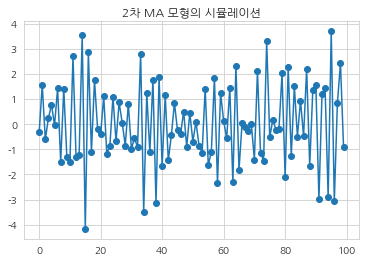

In [30]:
np.random.seed(0)
p2 = sm.tsa.ArmaProcess([1], [1, -1, 0.6])
y2 = p2.generate_sample(100, burnin=10)
plt.plot(y2, 'o-')
plt.title("2차 MA 모형의 시뮬레이션")
plt.show()

이 시계열 데이터의  𝑙 -시차 상관계수, 즉  𝑌𝑡 와  𝑌𝑡−𝑙 의 상관계수를 조사하기 위해 스캐터플롯을 그려보았다.  

#### 𝑙=1,  2 일 때만 상관관계가 있고  𝑙>2 이면 상관관계가 없다는 것을 확인할 수 있다.

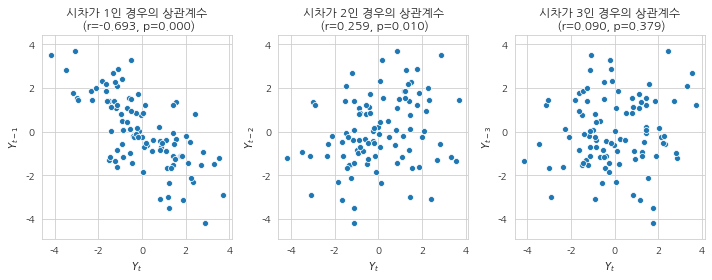

In [31]:
plt.figure(figsize=(10, 4))

plt.subplot(131)
r, p = sp.stats.pearsonr(y2[1:], y2[:-1])
sns.scatterplot(y2[1:], y2[:-1])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-1}$")
plt.title("시차가 1인 경우의 상관계수\n (r={0:.3f}, p={1:.3f})".format(r, p))

plt.subplot(132)
r, p = sp.stats.pearsonr(y2[2:], y2[:-2])
sns.scatterplot(y2[2:], y2[:-2])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-2}$")
plt.title("시차가 2인 경우의 상관계수\n (r={0:.3f}, p={1:.3f})".format(r, p))

plt.subplot(133)
r, p = sp.stats.pearsonr(y2[3:], y2[:-3])
sns.scatterplot(y2[3:], y2[:-3])
plt.axis("equal")
plt.xlabel("$Y_t$")
plt.ylabel("$Y_{t-3}$")
plt.title("시차가 3인 경우의 상관계수\n (r={0:.3f}, p={1:.3f})".format(r, p))

plt.tight_layout()
plt.show()

시차가 1인 경우에는 0.693, 시차가 2인 경우에는 0.259이며 귀무가설 기각으로 이 값들이 인정되나, 시차가 3인 경우에는 유의확률이 커 귀무가설을 채택하여 상관계수가 0과 마찬가지라고 해석할 수 있다.

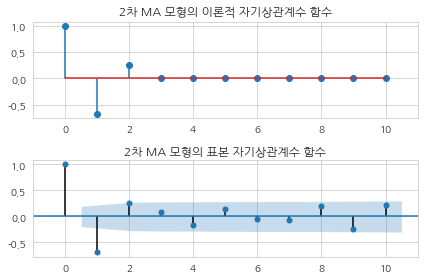

In [32]:
plt.subplot(211)
plt.stem(p2.acf(11), use_line_collection=True)
plt.xlim(-1, 11)
plt.title("2차 MA 모형의 이론적 자기상관계수 함수")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y2, lags=10, ax=ax)
plt.xlim(-1, 11)
plt.title("2차 MA 모형의 표본 자기상관계수 함수")

plt.tight_layout()
plt.show()

## 𝑞 차 MA모형

일반적인  𝑞 차의 MA모형은 MA(q)의 기댓값은 0이며 자기공분산과 자기상관계수는 다음 성질을 만족한다.

$$\gamma_0 = \sigma_{\epsilon}^2 (1 + \theta_1^2 + \cdots  + \theta_q^2)$$

$$\rho_l = 
\begin{cases} 
\dfrac{\theta_l + \theta_1\theta_{l-1}  + \theta_2\theta_{l-2} + \cdots + \theta_q\theta_{l-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } l = 1, 2, \cdots, q \\ 
0 & \text{ for } l > q \\ 
\end{cases}$$

4차 MA모형의 시계열 데이터와 자기상관계수 함수의 예를 아래에 보였다.

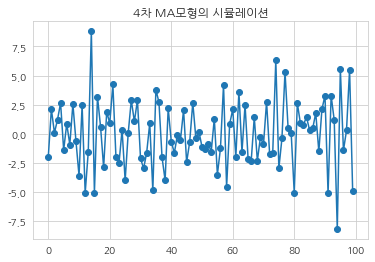

In [34]:
np.random.seed(0)
p3 = sm.tsa.ArmaProcess([1], [1, -1, 1.6, 0.9, -1.5])
y3 = p3.generate_sample(100, burnin=10)
plt.plot(y3, 'o-')
plt.title("4차 MA모형의 시뮬레이션")
plt.show()

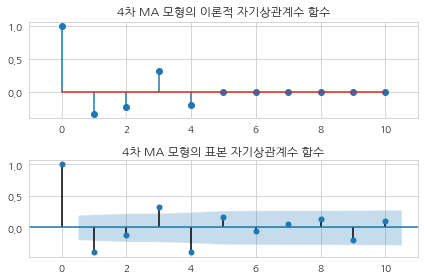

In [35]:
plt.subplot(211)
plt.stem(p3.acf(11), use_line_collection=True)
plt.xlim(-1, 11)
plt.title("4차 MA 모형의 이론적 자기상관계수 함수")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y3, lags=10, ax=ax)
plt.xlim(-1, 11)
plt.title("4차 MA 모형의 표본 자기상관계수 함수")

plt.tight_layout()
plt.show()